Financial Data Analysis Project


In [1]:
import pandas as pd              # data tables
import numpy as np               # numbers/math
import matplotlib.pyplot as plt  # basic graphs
import seaborn as sns            # advanced/beautiful graphs
import yfinance as yf            #stock market data

1: Data Collection

In [2]:
stocks = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "JPM", "XOM", "JNJ"]

In [3]:
data = yf.download(stocks, start="2020-01-01", end="2025-01-01", auto_adjust=True)["Close"] #Download data (last 5 years)

[*********************100%***********************]  8 of 8 completed


In [4]:
print(data.head()) #Display first rows

Ticker           AAPL       AMZN       GOOG         JNJ         JPM  \
Date                                                                  
2020-01-02  72.538513  94.900497  67.903816  124.072990  120.154686   
2020-01-03  71.833267  93.748497  67.570602  122.636459  118.569084   
2020-01-06  72.405655  95.143997  69.236694  122.483513  118.474815   
2020-01-07  72.065140  95.343002  69.193489  123.231438  116.460663   
2020-01-08  73.224396  94.598503  69.738762  123.214478  117.369164   

Ticker            MSFT       TSLA        XOM  
Date                                          
2020-01-02  152.791138  28.684000  54.131062  
2020-01-03  150.888580  29.534000  53.695877  
2020-01-06  151.278641  30.102667  54.108173  
2020-01-07  149.899292  31.270666  53.665352  
2020-01-08  152.286911  32.809334  52.856052  


2.Exploratory Data Analysis (EDA)

In [8]:
#  Basic Info
print("Shape of data:", data.shape)
print("\nSummary statistics:")
print(data.describe())

Shape of data: (1258, 8)

Summary statistics:
Ticker         AAPL         AMZN         GOOG          JNJ          JPM  \
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     151.806048   146.713811   119.128633   145.365074   137.464312   
std       41.970402    32.004698    32.724262    11.963114    38.382573   
min       54.316940    81.820000    52.471924    95.070221    67.735413   
25%      126.636372   121.000000    93.549812   140.464680   111.573660   
50%      150.392899   153.872498   120.194481   147.656456   134.052277   
75%      176.399685   170.000000   140.730675   153.502056   149.993179   
max      258.103729   232.929993   197.520340   167.566452   246.293060   

Ticker         MSFT         TSLA          XOM  
count   1258.000000  1258.000000  1258.000000  
mean     287.533652   213.430922    75.075172  
std       81.572007    83.461475    29.503880  
min      129.171265    24.081333    24.356314  
25%      227.971066   173.882500    47

In [9]:
# Check missing values
print("\nMissing values per stock:")
print(data.isnull().sum())


Missing values per stock:
Ticker
AAPL    0
AMZN    0
GOOG    0
JNJ     0
JPM     0
MSFT    0
TSLA    0
XOM     0
dtype: int64


In [14]:
# Fill missing values (if any)
data = data.ffill()

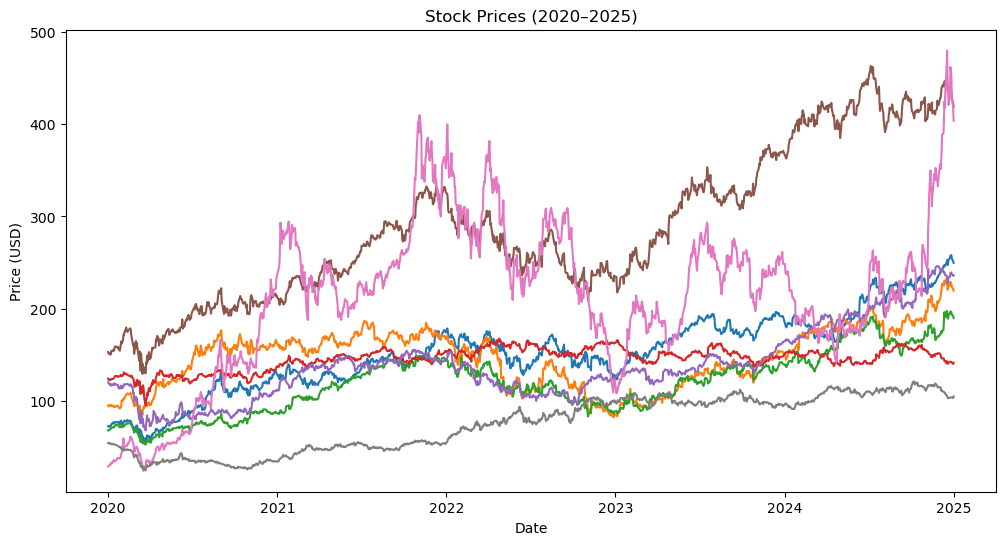

In [27]:
# Plot stock price trends
plt.figure(figsize=(12,6))
for stock in data.columns:
    plt.plot(data[stock], label=stock)
    
plt.title("Stock Prices (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [28]:
# Calculate daily returns
returns = data.pct_change().dropna()
print("\nDaily returns sample:")
print(returns.head())


Daily returns sample:
Ticker          AAPL      AMZN      GOOG       JNJ       JPM      MSFT  \
Date                                                                     
2020-01-03 -0.009722 -0.012139 -0.004907 -0.011578 -0.013196 -0.012452   
2020-01-06  0.007968  0.014886  0.024657 -0.001247 -0.000795  0.002585   
2020-01-07 -0.004703  0.002092 -0.000624  0.006106 -0.017001 -0.009118   
2020-01-08  0.016086 -0.007809  0.007880 -0.000138  0.007801  0.015928   
2020-01-09  0.021241  0.004799  0.011044  0.002966  0.003652  0.012493   

Ticker          TSLA       XOM  
Date                            
2020-01-03  0.029633 -0.008039  
2020-01-06  0.019255  0.007678  
2020-01-07  0.038801 -0.008184  
2020-01-08  0.049205 -0.015080  
2020-01-09 -0.021945  0.007656  


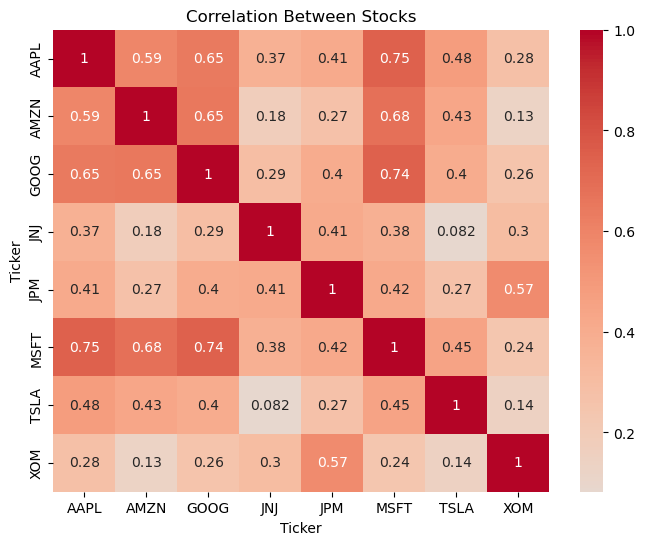

In [29]:
#  Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Stocks")
plt.show()

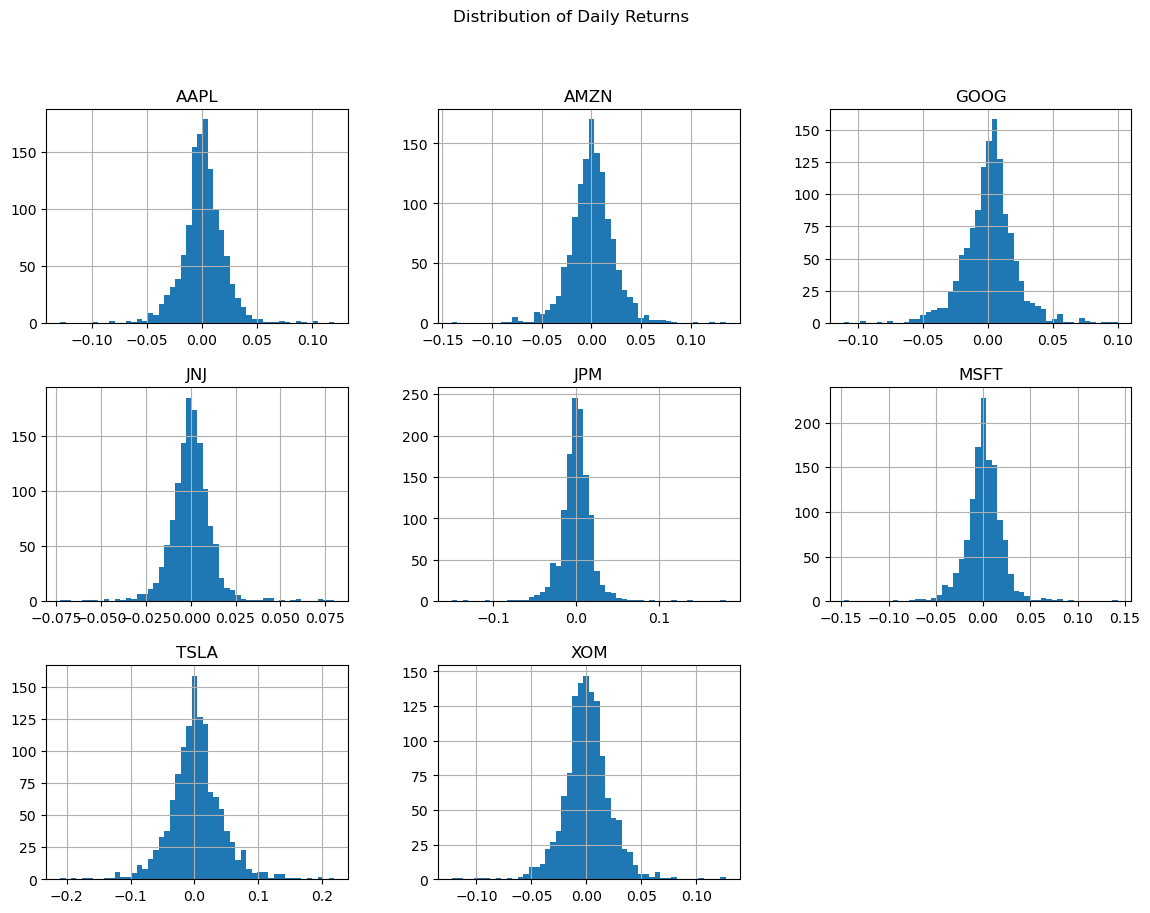

In [30]:
# Distribution of returns
returns.hist(bins=50, figsize=(14,10))
plt.suptitle("Distribution of Daily Returns")
plt.show()

3.Risk & Performance Analysis

In [31]:
# 1. Mean daily return
mean_returns = returns.mean()
print("Mean Daily Returns:\n", mean_returns)

Mean Daily Returns:
 Ticker
AAPL    0.001182
AMZN    0.000923
GOOG    0.001026
JNJ     0.000179
JPM     0.000746
MSFT    0.000988
TSLA    0.002997
XOM     0.000759
dtype: float64


In [32]:
# 2. Daily volatility (standard deviation)
volatility = returns.std()
print("\nDaily Volatility:\n", volatility)


Daily Volatility:
 Ticker
AAPL    0.019956
AMZN    0.022655
GOOG    0.020401
JNJ     0.012382
JPM     0.020490
MSFT    0.019211
TSLA    0.042320
XOM     0.021657
dtype: float64


In [33]:
# 3. Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = mean_returns / volatility
print("\nSharpe Ratio:\n", sharpe_ratio)


Sharpe Ratio:
 Ticker
AAPL    0.059237
AMZN    0.040752
GOOG    0.050308
JNJ     0.014483
JPM     0.036396
MSFT    0.051418
TSLA    0.070827
XOM     0.035050
dtype: float64


In [34]:
# 4. Annualize returns and volatility (optional, for yearly perspective)
trading_days = 252  # typical number of trading days in a year
annual_returns = mean_returns * trading_days
annual_volatility = volatility * np.sqrt(trading_days)
annual_sharpe = annual_returns / annual_volatility

print("\nAnnualized Returns:\n", annual_returns)
print("\nAnnualized Volatility:\n", annual_volatility)
print("\nAnnualized Sharpe Ratio:\n", annual_sharpe)



Annualized Returns:
 Ticker
AAPL    0.297892
AMZN    0.232658
GOOG    0.258633
JNJ     0.045193
JPM     0.187930
MSFT    0.248931
TSLA    0.755347
XOM     0.191290
dtype: float64

Annualized Volatility:
 Ticker
AAPL    0.316786
AMZN    0.359639
GOOG    0.323850
JNJ     0.196566
JPM     0.325266
MSFT    0.304972
TSLA    0.671815
XOM     0.343796
dtype: float64

Annualized Sharpe Ratio:
 Ticker
AAPL    0.940356
AMZN    0.646921
GOOG    0.798620
JNJ     0.229914
JPM     0.577774
MSFT    0.816241
TSLA    1.124338
XOM     0.556406
dtype: float64


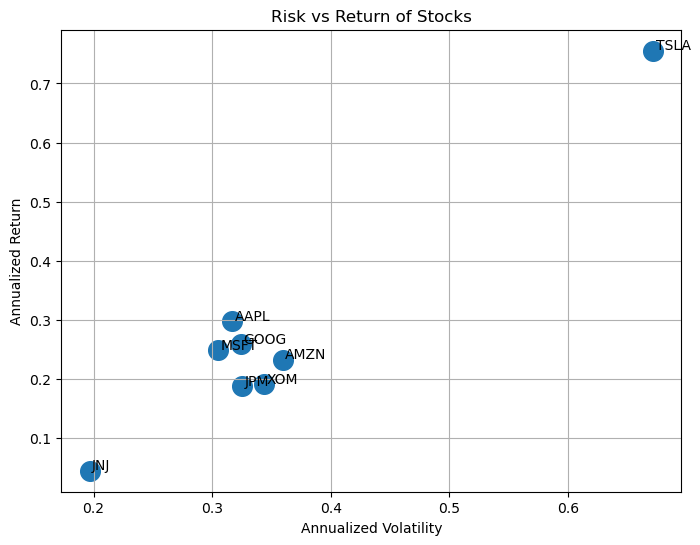

In [36]:
# 5. Visualize risk vs return
plt.figure(figsize=(8,6))
plt.scatter(annual_volatility, annual_returns, s=200)

for stock in data.columns:
    plt.text(annual_volatility[stock]+0.002, annual_returns[stock]+0.002, stock)

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk vs Return of Stocks")
plt.grid(True)
plt.show()